<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Inversion About the Mean</h2>

[Watch Lecture](https://youtu.be/RIL2lAwraUA)

We play a simple game to give some ideas about how Grover's search algorithm works.

We have a list of N elements. 

Some of them are marked.

At the beginning each has a value of 1.

 Each iteration of the game has two phases:

<ol>
    <li><b>Query</b>: In this phase, we assume that each marked element is detected, and then its sign is flipped.</li>
    <li><b>Inversion</b>: In this phase, the value of each element is reflected over the mean of all values.</li>
</ol>

<h3>Task 1</h3>

We play this game for $ N = 8 $.

Suppose that only the 4th element is marked.

We can visualize the values of elements in the list in the beginning as follows.

<BarContainer object of 8 artists>

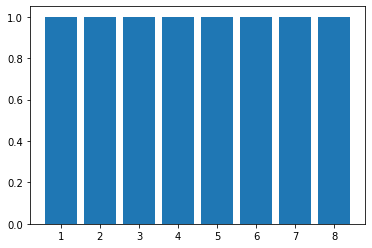

In [4]:
from matplotlib.pyplot import bar

name= []
elements = []
for i in range(8):
    name = name + [i+1]
    elements  = elements + [1]
bar(name,elements)

Iterate the game for one step and visualize the values of elements in the list after each phase.

1st step - query phase:

<BarContainer object of 8 artists>

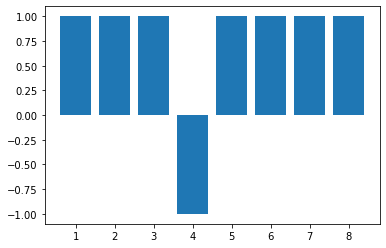

In [5]:
# 
# 1st step - query
#
elements[3] = -1 * elements[3]
bar(name,elements)

1st step - inversion phase:

<BarContainer object of 8 artists>

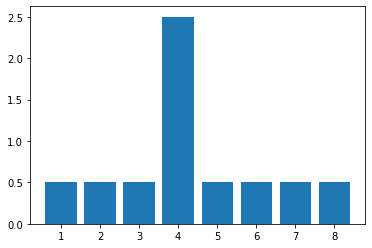

In [6]:
#
# 1st step - inversion
#
sum = 0
for i in range(len(elements)):
    sum += elements[i]
mean = sum / len(elements)
for i in range(len(elements)):
    x = elements[i]
    xprime = mean - (elements[i]-mean)
    elements[i] = xprime
bar(name,elements)

Iterate the game for one more step and visualize the values of elements in the list after each phase.

2nd step - query phase:

<BarContainer object of 8 artists>

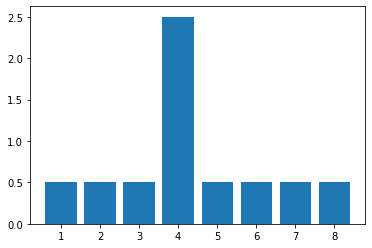

In [8]:
# 
# 2nd step - query
#

elements[3] = -1 * elements[3]
bar(name,elements)

2nd step - inversion phase:

<BarContainer object of 8 artists>

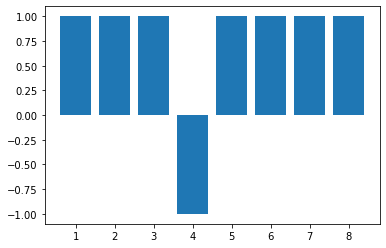

In [9]:
#
# 2nd step - inversion
#

sum = 0
for i in range(len(elements)):
    sum += elements[i]
mean = sum / len(elements)
for i in range(len(elements)):
    x = elements[i]
    xprime = mean - (elements[i]-mean)
    elements[i] = xprime
bar(name,elements)

Iterate the game three more steps and visualize the values of elements in the list at the end.

<BarContainer object of 8 artists>

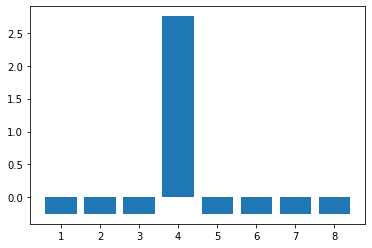

In [10]:
for i in range(3):
    elements[3] = -1 * elements[3]
    sum = 0
    for i in range(len(elements)):
        sum += elements[i]
    mean = sum / len(elements)
    for i in range(len(elements)):
        x = elements[i]
        xprime = mean - (elements[i]-mean)
        elements[i] = xprime
bar(name,elements)        

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task1">click for our solution</a>

<a id="task2"></a>
<h3>Task 2</h3>

Write a function called *query* that 
- takes a list of elements and the list of marked elements,
- change the sign of the marked elements, and then
- returns the list.

Write a function called *inversion* that
- takes a list of elements and
- reflects the value of each element over the mean of all values, and then
- return the list.

We iterate the same game given in Task 1 ($ N = 8 $ and the 4th element is the only marked one) 20 steps by using the functions *query* and *inversion*. 

**This time we trace the values of only the 4th element. We store the values of the 4th element on a list after each step, and then, we display this list as a bar chart.**

In [29]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

In [30]:
def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]
    mean = summation / len(elements)
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2.5, 2.75, 1.625, -0.3125, -2.09375, -2.828125, -2.1484375, -0.39453125, 1.556640625, 2.7294921875, 2.53759765625, 1.076904296875, -0.9222412109375, -2.46026611328125, -2.768157958984375, -1.6919708251953125, 0.23020172119140625, 2.037273406982422, 2.8257083892822266, 2.201289176940918]


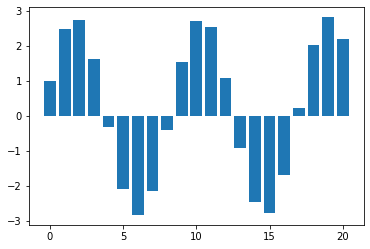

In [31]:
from matplotlib.pyplot import bar

elements = []
for i in range(8):
    elements  = elements + [1]
marked_elements = [3]
iterations = []
L = []
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    iterations.append(step+1)
    elements = query(elements,marked_elements)
    elements = inversion(elements)    
    L.append(elements[marked_elements[0]])
    
bar(iterations,L)
print(iterations)
print(L)

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task2">click for our solution</a>

<h3>Task 3</h3>

Repeat Task 2 where $ N = 16 $ and the 11th element is marked.

In [32]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]
    mean = summation / len(elements)
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2.75, 3.8125, 3.921875, 3.05078125, 1.4169921875, -0.571044921875, -2.41632080078125, -3.6575164794921875, -3.984333038330078, -3.315066337585449, -1.817033052444458, 0.1352584958076477, 2.0537354201078415, 3.458778489381075, 3.9991269363090396, 3.5396936491597444, 2.195336949720513, 0.3021460128511535, -1.6665814272309944, -3.218663510505394]


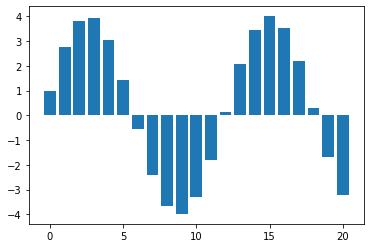

In [33]:
from matplotlib.pyplot import bar


elements = []
for i in range(16):
    elements  = elements + [1]
marked_elements = [10]
iterations = []
L = []
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    iterations.append(step+1)
    elements = query(elements,marked_elements)
    elements = inversion(elements)    
    L.append(elements[marked_elements[0]])
    
bar(iterations,L)
print(iterations)
print(L)

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4</h3>

Repeat Task 3 by tracing only the 5th element where $ N = 16 $ and the 5th, 8th, and 10th elements are marked.

In [34]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]
    mean = summation / len(elements)
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2.25, 1.8125, 0.015625, -1.79296875, -2.2568359375, -1.028076171875, 0.97174072265625, 2.2427520751953125, 1.8316993713378906, 0.04687213897705078, -1.7731091976165771, -2.263258635997772, -1.0559640973806381, 0.9433035142719746, 2.2350934902206063, 1.8505633485037833, 0.07811069540912285, -1.7529249792423798, -2.2692669194620976, -1.0836586700852422]


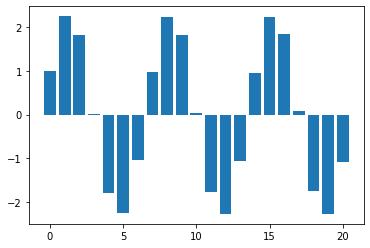

In [35]:
from matplotlib.pyplot import bar

elements = []
for i in range(16):
    elements  = elements + [1]
marked_elements = [5,8,10]
iterations = []
L = []
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    iterations.append(step+1)
    elements = query(elements,marked_elements)
    elements = inversion(elements)
    L.append(elements[marked_elements[0]])
    
bar(iterations,L)
print(iterations)
print(L)

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5</h3>

We iterate the same game 20 steps where $ N = 16 $ and the marked elements are the first four elements. 

Print the length of the list of elements after each query and inversion phases. 

*Remark that the initial length is $ \sqrt{ \sum_{i=1}^{N} 1^2 } = \sqrt{N} = \sqrt{16}  =4 $.*

In [36]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]
    mean = summation / len(elements)
    
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

def length_of_list (elements=[1]):
    summation = 0
    for el in elements:
        summation = summation + el**2
    return round(summation**0.5,3)

In [37]:
elements = []
for i in range(16):
    elements  = elements + [1]
marked_elements = [0,1,2,3]
print(" initial length",length_of_list(elements))
for step in range(20):
    iterations.append(step+1)
    elements = query(elements,marked_elements)
    print("step",step,"  after query  ",length_of_list(elements))
    elements = inversion(elements)
    print("step",step,"  after inversion  ",length_of_list(elements))

the initial length 4.0
step 0 the length after query is  4.0
step 0 the length after inversion is  4.0
step 1 the length after query is  4.0
step 1 the length after inversion is  4.0
step 2 the length after query is  4.0
step 2 the length after inversion is  4.0
step 3 the length after query is  4.0
step 3 the length after inversion is  4.0
step 4 the length after query is  4.0
step 4 the length after inversion is  4.0
step 5 the length after query is  4.0
step 5 the length after inversion is  4.0
step 6 the length after query is  4.0
step 6 the length after inversion is  4.0
step 7 the length after query is  4.0
step 7 the length after inversion is  4.0
step 8 the length after query is  4.0
step 8 the length after inversion is  4.0
step 9 the length after query is  4.0
step 9 the length after inversion is  4.0
step 10 the length after query is  4.0
step 10 the length after inversion is  4.0
step 11 the length after query is  4.0
step 11 the length after inversion is  4.0
step 12 the l

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task5">click for our solution</a>

<h3>Task 6 </h3>

Repeat Task 5 where $ N = 10 $ and the last element is marked.

*Remark that the initial length is $ \sqrt{10} $.*

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]
    mean = summation / len(elements)
    
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

def length_of_list (elements=[1]):
    summation = 0
    for el in elements:
        summation = summation + el**2
    return round(summation**0.5,3)

In [38]:
elements = []
for i in range(10):
    elements  = elements + [1]
marked_elements = [9]
print("the initial length",length_of_list(elements))
for step in range(20):
    iterations.append(step+1)
    elements = query(elements,marked_elements)
    print("step",step,"the length after query is ",length_of_list(elements))
    elements = inversion(elements)
    print("step",step,"the length after inversion is ",length_of_list(elements))

the initial length 3.162
step 0 the length after query is  3.162
step 0 the length after inversion is  3.162
step 1 the length after query is  3.162
step 1 the length after inversion is  3.162
step 2 the length after query is  3.162
step 2 the length after inversion is  3.162
step 3 the length after query is  3.162
step 3 the length after inversion is  3.162
step 4 the length after query is  3.162
step 4 the length after inversion is  3.162
step 5 the length after query is  3.162
step 5 the length after inversion is  3.162
step 6 the length after query is  3.162
step 6 the length after inversion is  3.162
step 7 the length after query is  3.162
step 7 the length after inversion is  3.162
step 8 the length after query is  3.162
step 8 the length after inversion is  3.162
step 9 the length after query is  3.162
step 9 the length after inversion is  3.162
step 10 the length after query is  3.162
step 10 the length after inversion is  3.162
step 11 the length after query is  3.162
step 11 

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task6">click for our solution</a>

### Length preserving game

As observed from the last two tasks, each phase of the game is a length preserving operator (function).

*Do you think that query and inversion operators are linear? More specifically, can we represent them in the form of a matrix?*

The answer for the query operator is easy as it only changes the sign of marked elements, and so its matrix form is very similar to an Identity matrix having -1 in some of diagonale entries.

<h3> Modified Game </h3>

In this part, we restrict the game by guaranteeing that the list represents a quantum state.

<h3> Task 7</h3>

What are the initial values for the modified game if $ N=8 $?

<h3>Solution:</h3>

Preserving the probability implies:

$ 8a^2 = 1 \implies a = \frac{1}{2\sqrt{2}} $

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task7">click for our solution</a>

<h3> Task 8</h3>

Iterate the modified game for 20 steps where $ N = 8 $ and the second element is marked.

Print the list of elements after each phase.

Check whether the length of list is 1 after each iteration.

In [12]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]
    mean = summation / len(elements)
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

def length_of_list(elements=[1]):
    summation = 0
    for el in elements:
        summation = summation + el**2
    return round(summation**0.5,3)
def print_list(L,precision):
    output = ""
    for i in range(len(L)):
        output = output + str(round(L[i],precision))+"  "
    print(output)

In [14]:
elements = []
for i in range(8):
    elements  = elements + [1/(8**0.5)]
marked_elements = [1]

print("step 0")
print("the list of elements is")
print_list(elements,3)
print("the initial length",length_of_list(elements))
iterations = []

for step in range(20):
    iterations.append(step+1)
    elements = query(elements,marked_elements)
    elements = inversion(elements)
    print()
    print("after step",step+1)
    print("the list of elements is")
    print_list(elements,3)
    print("the length after iteration is ",length_of_list(elements))

step 0
the list of elements is
0.354  0.354  0.354  0.354  0.354  0.354  0.354  0.354  
the initial length 1.0

after step 1
the list of elements is
0.177  0.884  0.177  0.177  0.177  0.177  0.177  0.177  
the length after iteration is  1.0

after step 2
the list of elements is
-0.088  0.972  -0.088  -0.088  -0.088  -0.088  -0.088  -0.088  
the length after iteration is  1.0

after step 3
the list of elements is
-0.309  0.575  -0.309  -0.309  -0.309  -0.309  -0.309  -0.309  
the length after iteration is  1.0

after step 4
the list of elements is
-0.376  -0.11  -0.376  -0.376  -0.376  -0.376  -0.376  -0.376  
the length after iteration is  1.0

after step 5
the list of elements is
-0.254  -0.74  -0.254  -0.254  -0.254  -0.254  -0.254  -0.254  
the length after iteration is  1.0

after step 6
the list of elements is
-0.006  -1.0  -0.006  -0.006  -0.006  -0.006  -0.006  -0.006  
the length after iteration is  1.0

after step 7
the list of elements is
0.246  -0.76  0.246  0.246  0.246  0.

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task8">click for our solution</a>

<h3> Task 9</h3>

Repeat Task 8 for $ N = 16 $ where the first 12 elements are marked.

In [41]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]
    mean = summation / len(elements)
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

def length_of_list (elements=[1]):
    summation = 0
    for el in elements:
        summation = summation + el**2
    return round(summation**0.5,3)
def print_list(L,precision):
    output = ""
    for i in range(len(L)):
        output = output + str(round(L[i],precision))+"  "
    print(output)

In [42]:
elements = []
for i in range(16):
    elements  = elements + [1/(16**0.5)]
marked_elements = range(12)

print("step 0")
print("the list of elements is")
print_list(elements,3)
print("the initial length",length_of_list(elements))

for step in range(20):
    iterations.append(step+1)
    elements = query(elements,marked_elements)
    elements = inversion(elements)
    print()
    print("after step",step+1)
    print("the list of elements is")
    print_list(elements,3)
    print("the length after iteration is ",length_of_list(elements))

step 0
the list of elements is
0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  
the initial length 1.0

after step 1
the list of elements is
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.5  -0.5  -0.5  -0.5  
the length after iteration is  1.0

after step 2
the list of elements is
-0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  0.25  0.25  0.25  0.25  
the length after iteration is  1.0

after step 3
the list of elements is
0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  
the length after iteration is  1.0

after step 4
the list of elements is
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.5  -0.5  -0.5  -0.5  
the length after iteration is  1.0

after step 5
the list of elements is
-0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  -0.25  0.25  0.25  0.25  0.25  
the length after iteration is  1.0

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task9">click for our solution</a>

<h3> Grover's quantum search algorithm </h3>

The modified game is the main part of Grover's quantum search algorithm.

Suppose that we are given an unordered list and we make a search of a specific element called as marked.
- We access the list via an oracle: we can make queries to the list.
- If there are $ N $ elements in the list, we use $ \log(N) $ qubits. (Assume that $N$ is a power of 2.) 
- Each basis state, i.e., $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $, corresponds to an index of the list.
- If the searched element is detected, then the oracle  flips the sign of the amplitude of the corresponding index.

At the beginning, Hadamard operator is applied to each qubit. Thus, the amplitude of each basis state is set to $ \frac{1}{\sqrt{N}} $.
- We can interpret this as all elements start the game with the same amplitude.
- Then, the game starts to iterate, and the amplitudes of marked and unmarked elements are changed.

<h4> The number of iterations </h4>

When the number of marked elements are less than the unmarked elements, the amplitudes of marked elements start to increase. 

Then, we reach the first peak such that the probability of observing a marked element takes its maximum value. 

After passing this point, the amplitudes of marked elements start to decrease.

<h4> Phases </h4>

The operator in each phase is unitary (linear).

The unitary matrix in the query phase depends on the input, but the unitary operator in the inversion phase does not depend on the input.

<b>In the query phase</b>, the amplitudes of the marked elements change sign.  

<b>In the inversion phase</b>, for each amplitude $ x $, the new value is calculated as $ mean - (x - mean) = 2mean -x $.

The mean of a column vector of size $ N $ can be calculated by multiplying it with the following row vector from the left:

$$  \myvector{ \frac{1}{N} ~~ \frac{1}{N} ~~ \cdots ~~ \frac{1}{N}} . $$


When considering all elements in the list, we work with a matrix. The matrix for the second phase should be 

$$ D = 2 \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    } 
- I . $$

<h3> Task 10</h3>

Convince yourself that $ D \myvector{x_1 \\ \vdots \\ x_N} = \myvector{ 2m-x_1 \\ \vdots \\ 2m-x_N } $, where $ m = \dfrac{ \sum_{i=1}^N x_i } { N} $.

<h3> Task 11</h3>

Let $ A =  \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    }  $. 
Convience yourself that $ A^2 = A $ and $ D^T = D $.

Since $ D = 2A - I $, convience yourself that $ D $ is unitary by showing that $ D^T \cdot D = I $, i.e., $ (2A-I)(2A-I) = I $.